In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv("C:/Users/pranay/Downloads/bank-full (1).csv",sep=';')

In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['education']= label_encoder.fit_transform(data['education'])
data['default']= label_encoder.fit_transform(data['default'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['loan']= label_encoder.fit_transform(data['loan'])
data['contact']= label_encoder.fit_transform(data['contact'])
data['month']= label_encoder.fit_transform(data['month'])
data['poutcome']= label_encoder.fit_transform(data['poutcome'])
data['job'].unique()
data['y']= label_encoder.fit_transform(data['y'])
data['y'].unique()
data['marital'].unique()
data['education'].unique()
data['default'].unique()
data['housing'].unique()
data['loan'].unique()
data['contact'].unique()
data['month'].unique()
data['poutcome'].unique()

array([3, 0, 1, 2], dtype=int64)

In [9]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
Y = data['y']
X = data.drop(columns=['y'])

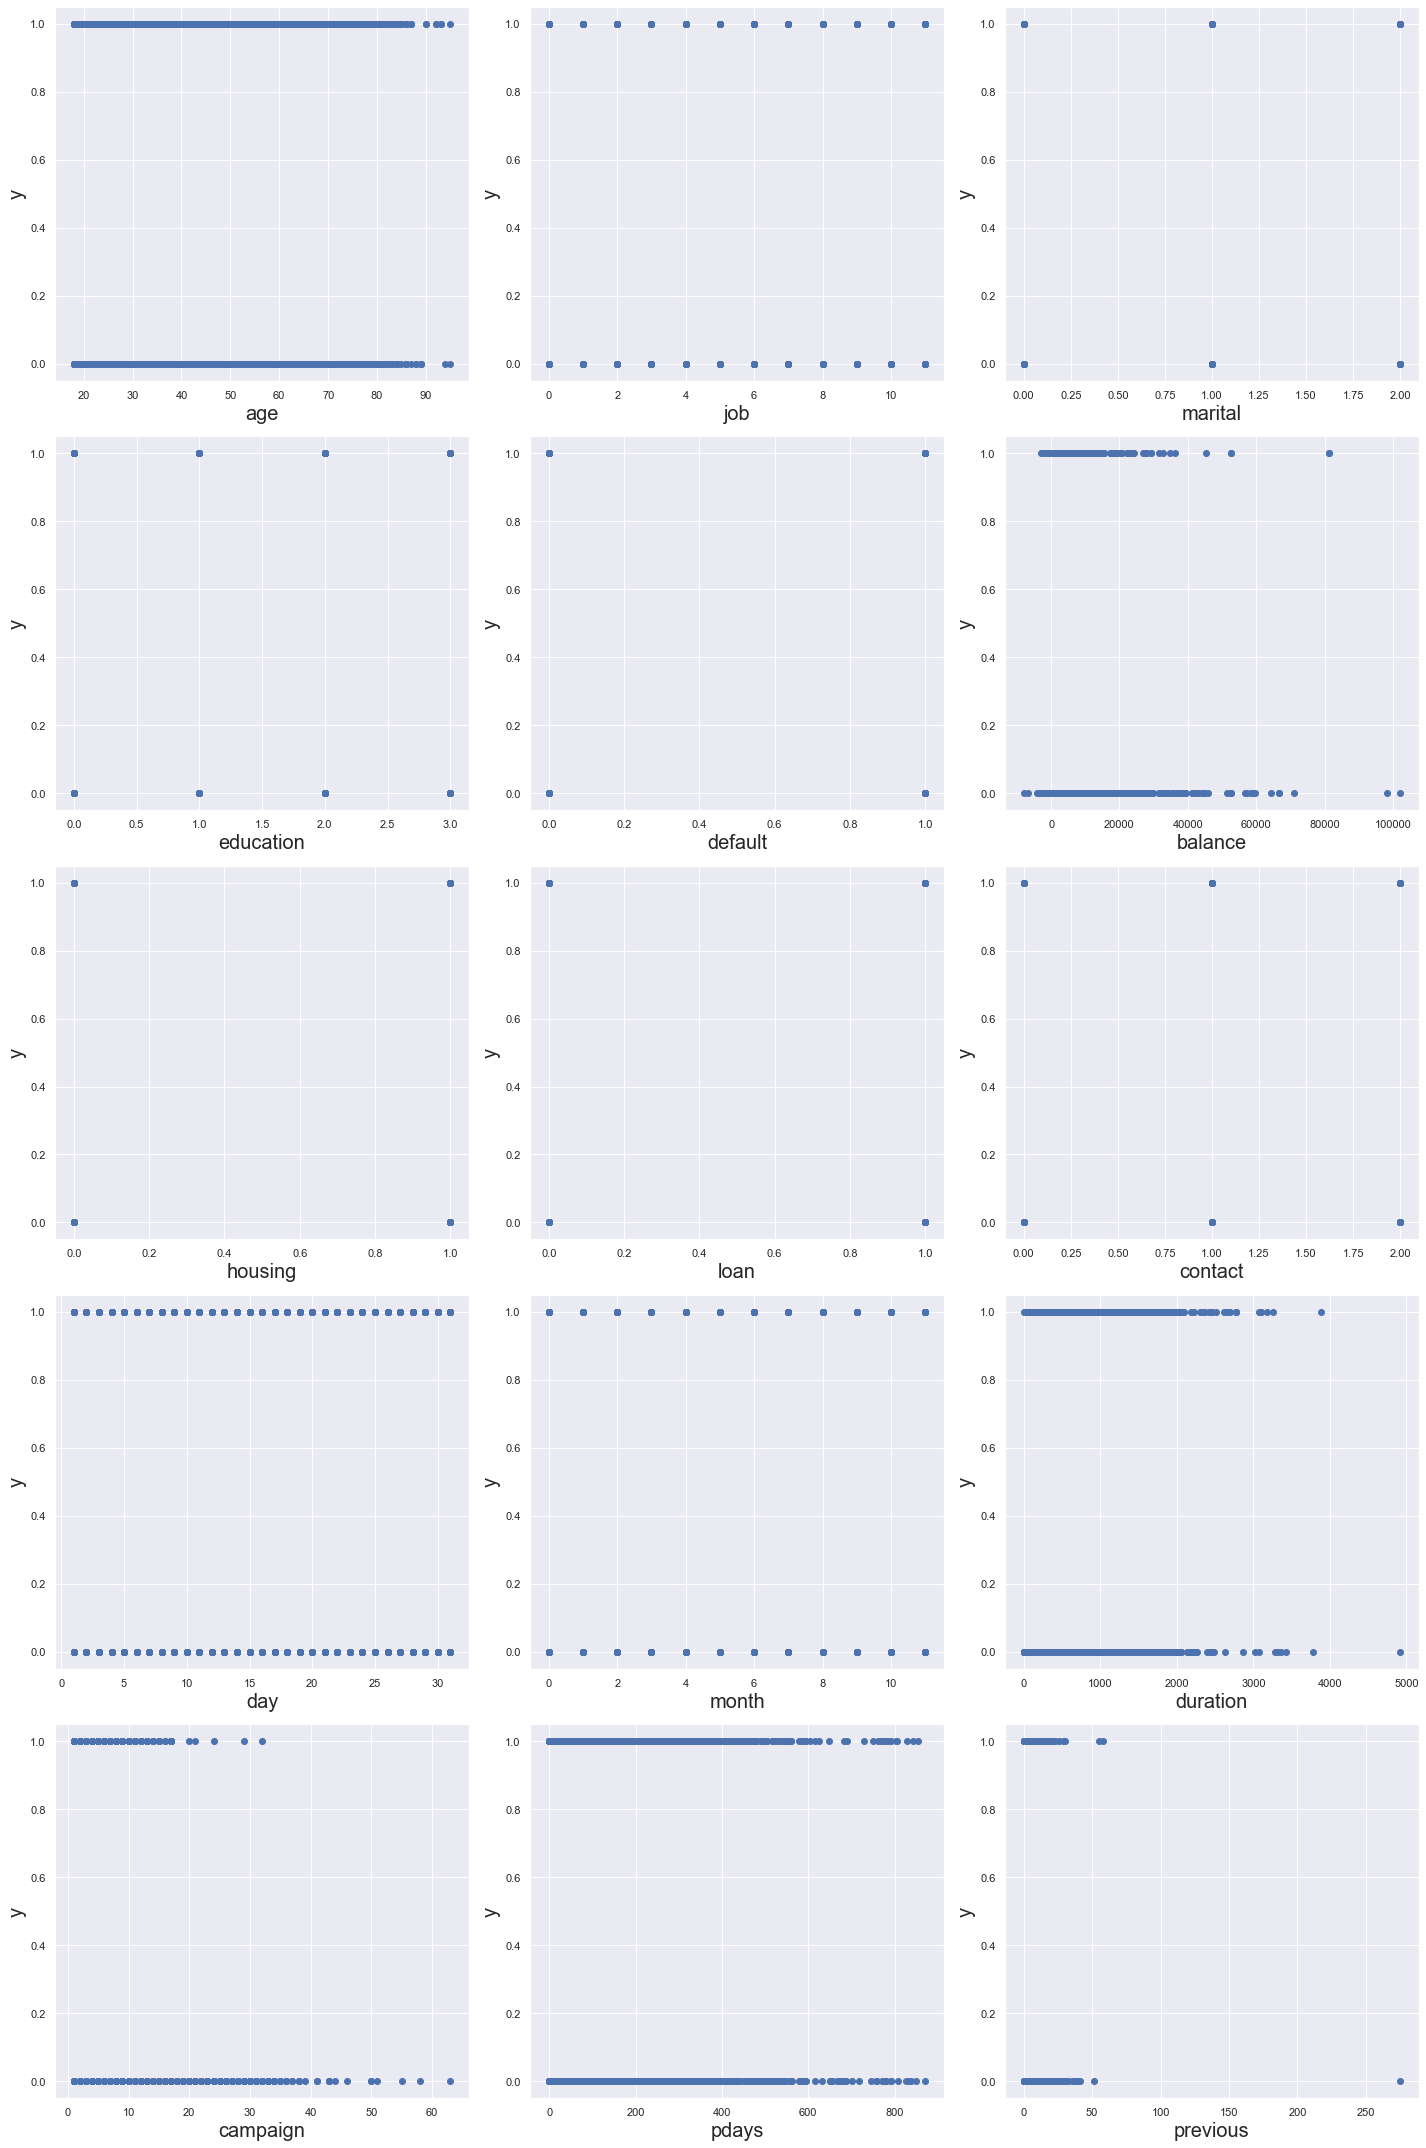

In [12]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber +=1
plt.tight_layout()

<AxesSubplot:>

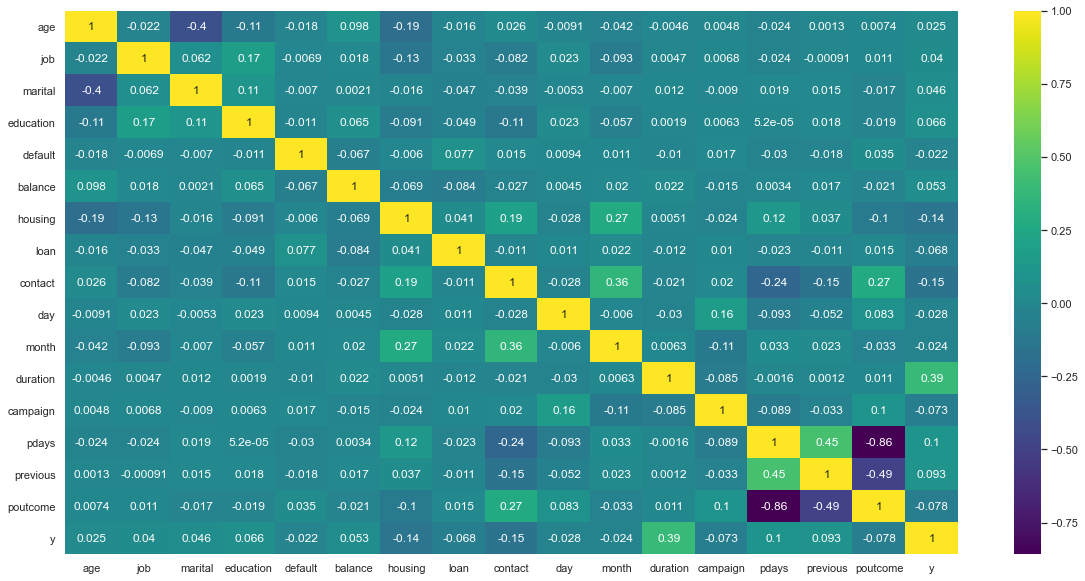

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(), annot=True, cmap='viridis')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 16) (9043, 16) (36168,) (9043,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [20]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [24]:
y_pred_df

,actual,predicted_prob
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,1


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[7803  177]
 [ 834  229]]


In [31]:
((7803+229)/(7803+177+834+229)) * 100

88.82008183125069

In [32]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.56      0.22      0.31      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



Text(0, 0.5, 'True Positive Rate')

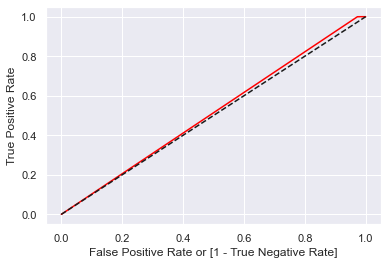

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')



In [34]:
auc

0.5966237913692981